ERROR:root:Line magic function `%matplot` not found.


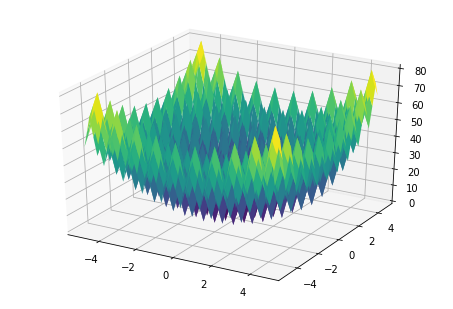

In [51]:
%matplot inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)
Z = 20 + X**2 + Y**2 - 10*(np.cos(2*np.pi*X)+np.cos(2*np.pi*Y))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

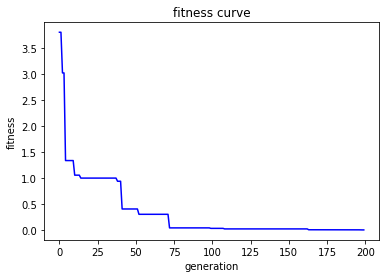

In [60]:
# -*- coding: utf-8 -*-
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

import numpy as np
import matplotlib.pyplot as plt

# 目标函数定义
def ras(x):
    y = 20 + x[0]**2 + x[1]**2 - 10*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))
    return y
    
# 参数初始化
w = 1.0
c1 = 1.49445
c2 = 1.49445

maxgen = 200   # 进化次数  
sizepop = 20   # 种群规模

# 粒子速度和位置的范围
Vmax =  1
Vmin = -1
popmax =  5
popmin = -5


# 产生初始粒子和速度
pop = 5 * np.random.uniform(-1,1,(2,sizepop))
v = np.random.uniform(-1,1,(2,sizepop))


fitness = ras(pop)             # 计算适应度
i = np.argmin(fitness)      # 找最好的个体
gbest = pop                    # 记录个体最优位置
zbest = pop[:,i]              # 记录群体最优位置
fitnessgbest = fitness        # 个体最佳适应度值
fitnesszbest = fitness[i]      # 全局最佳适应度值


# 迭代寻优
t = 0
record = np.zeros(maxgen)
while t < maxgen:
    
    # 速度更新
    v = w * v + c1 * np.random.random() * (gbest - pop) + c2 * np.random.random() * (zbest.reshape(2,1) - pop)
    v[v > Vmax] = Vmax     # 限制速度
    v[v < Vmin] = Vmin
    
    # 位置更新
    pop = pop + 0.5 * v;
    pop[pop > popmax] = popmax  # 限制位置
    pop[pop < popmin] = popmin
    

    # 自适应变异
    p = np.random.random()             # 随机生成一个0~1内的数
    if p > 0.8:                          # 如果这个数落在变异概率区间内，则进行变异处理
        k = np.random.randint(0,2)     # 在[0,2)之间随机选一个整数
        pop[:,k] = np.random.random()  # 在选定的位置进行变异 


    # 计算适应度值
    fitness = ras(pop)
    
    # 个体最优位置更新
    index = fitness < fitnessgbest
    if t ==5:
        print index
    fitnessgbest[index] = fitness[index]
    gbest[:,index] = pop[:,index]

    # 群体最优更新
    j = np.argmin(fitness)
    if fitness[j] < fitnesszbest:
        zbest = pop[:,j]
        fitnesszbest = fitness[j]

    record[t] = fitnesszbest # 记录群体最优位置的变化   
    
    t = t + 1
    

# 结果分析
print zbest

plt.plot(record,'b-')
plt.xlabel('generation')  
plt.ylabel('fitness')  
plt.title('fitness curve')  
plt.show()

In [55]:
test_pop = 5 * np.random.uniform(-1,1,(2,sizepop))
test_pop.shape

(2, 20)

In [62]:
index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [63]:
fitness

array([ 3.21731837, 27.53485868, 12.77140099, 28.40805562, 24.79317556,
       28.89127329, 39.70035392, 39.949744  , 13.40515848, 39.64112114,
       39.68981634, 32.21479953, 31.46583797, 39.85314609, 41.80968994,
        9.55333736, 40.17595589, 38.50967182, 40.05889535,  6.38437074])

In [64]:
fitnessgbest

array([0.02249499, 0.05820506, 0.04268543, 0.01449866, 0.08083737,
       0.00868606, 0.00332663, 0.0046552 , 0.2688803 , 1.70325591,
       0.00319457, 0.01468336, 0.01634859, 0.00621196, 0.99827933,
       0.40750941, 1.3054654 , 0.00959113, 1.23447793, 0.02763105])

In [65]:
fitnesszbest

0.003194571940984048